# Load Data

Here is the step that we load the data and give simple description about it.

In [1]:
import sys
!git clone https://github.com/z5365195Yuhao/elpv-dataset.git
sys.path.insert(0,'/content/elpv-dataset/utils')
from elpv_reader import load_dataset
images, proba, types = load_dataset()

Cloning into 'elpv-dataset'...
remote: Enumerating objects: 2689, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2689 (delta 0), reused 0 (delta 0), pack-reused 2688
Receiving objects: 100% (2689/2689), 90.79 MiB | 45.17 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
image = images[0]
print(image.shape)

(300, 300)


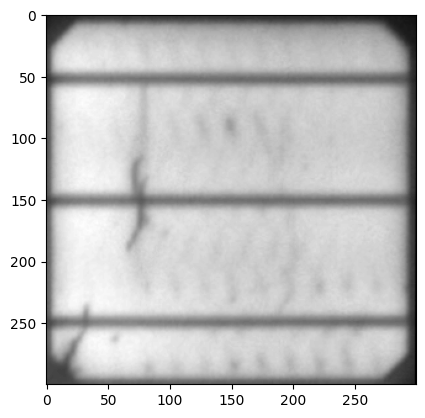

In [4]:
plt.imshow(image,cmap = "gray")

(array([1508.,    0.,    0.,  295.,    0.,    0.,  106.,    0.,    0.,
         715.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

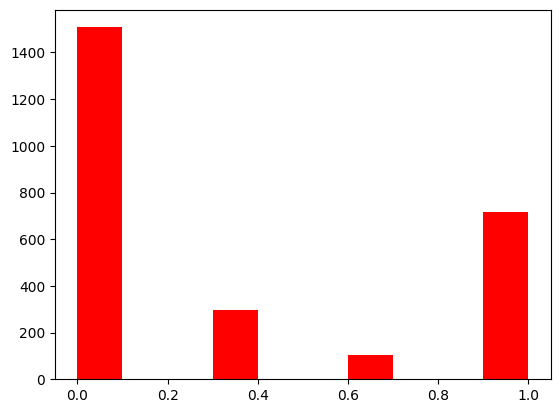

In [5]:
plt.hist(proba,color = "red")

As we can observe from the histogram, the number of panels labeled with 0.33 and 0.66 is much less than thoes labeled with 0 and 1. This imbalance needs special attention.

(array([1074.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1550.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

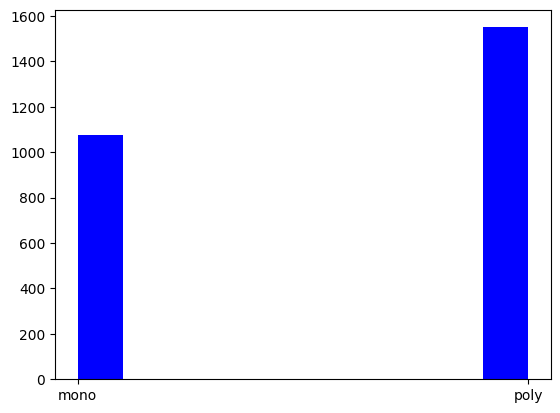

In [6]:
plt.hist(types,color = "blue")

In [7]:
print(len(images))

2624


# Simple Machine Learning Tryout

We first start with some simple machine learning approaches.

## Decision Tree

In [8]:
import sys
!git clone https://github.com/z5365195Yuhao/elpv-dataset.git
sys.path.insert(0,'/content/elpv-dataset/utils')
from elpv_reader import load_dataset
images, proba, types = load_dataset()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier

fatal: destination path 'elpv-dataset' already exists and is not an empty directory.


In [9]:
print(types[1613])#the last mono type
#First step: create trainning set and testing set
images = np.array(images)
proba = [f"{i:.2f}" for i in proba]
proba = np.array(proba)
X_train, X_test, y_train, y_test = train_test_split(images, proba, test_size=0.25, stratify=proba, random_state=0)

#Second step:extract features
#Since the task this time is to identify cracks or dark spots in the images, it would be better to extract texture features.

#method 1 -- Haralick features
#calculate the GLCM
Haralick_mean_features = []
for x in X_train:
  distance = [1]
  angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
  glcm = greycomatrix(x, distances=distance, angles=angles, symmetric=True, normed=True)
  #calculate Haralick Features
  contrast = greycoprops(glcm, 'contrast')
  homogeneity = greycoprops(glcm, 'homogeneity')
  energy = greycoprops(glcm, 'energy')
  entropy = -np.sum(glcm * np.log2(glcm + 1e-10))
  Haralick_mean_features.append([np.mean(contrast), np.mean(homogeneity), np.mean(energy), entropy])

mono


流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/pyth

In [10]:
#extract the features of test set
test_mean_set = []
test_set = []
for x in X_test:
  distance = [1]
  angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
  glcm = greycomatrix(x, distances=distance, angles=angles, symmetric=True, normed=True)
  #calculate Haralick Features
  contrast = greycoprops(glcm, 'contrast')
  homogeneity = greycoprops(glcm, 'homogeneity')
  energy = greycoprops(glcm, 'energy')
  entropy = -np.sum(glcm * np.log2(glcm + 1e-10))
  test_mean_set.append([np.mean(contrast), np.mean(homogeneity), np.mean(energy), entropy])
  test_set.append([contrast, homogeneity, energy])
test_mean_set = np.array(test_mean_set)
test_set = np.array(test_set)

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/pyth

[[321   9   0  47]
 [ 65   2   0   7]
 [ 18   1   0   7]
 [ 71   8   0 100]]
0.6448170731707317
0.5983544490945183


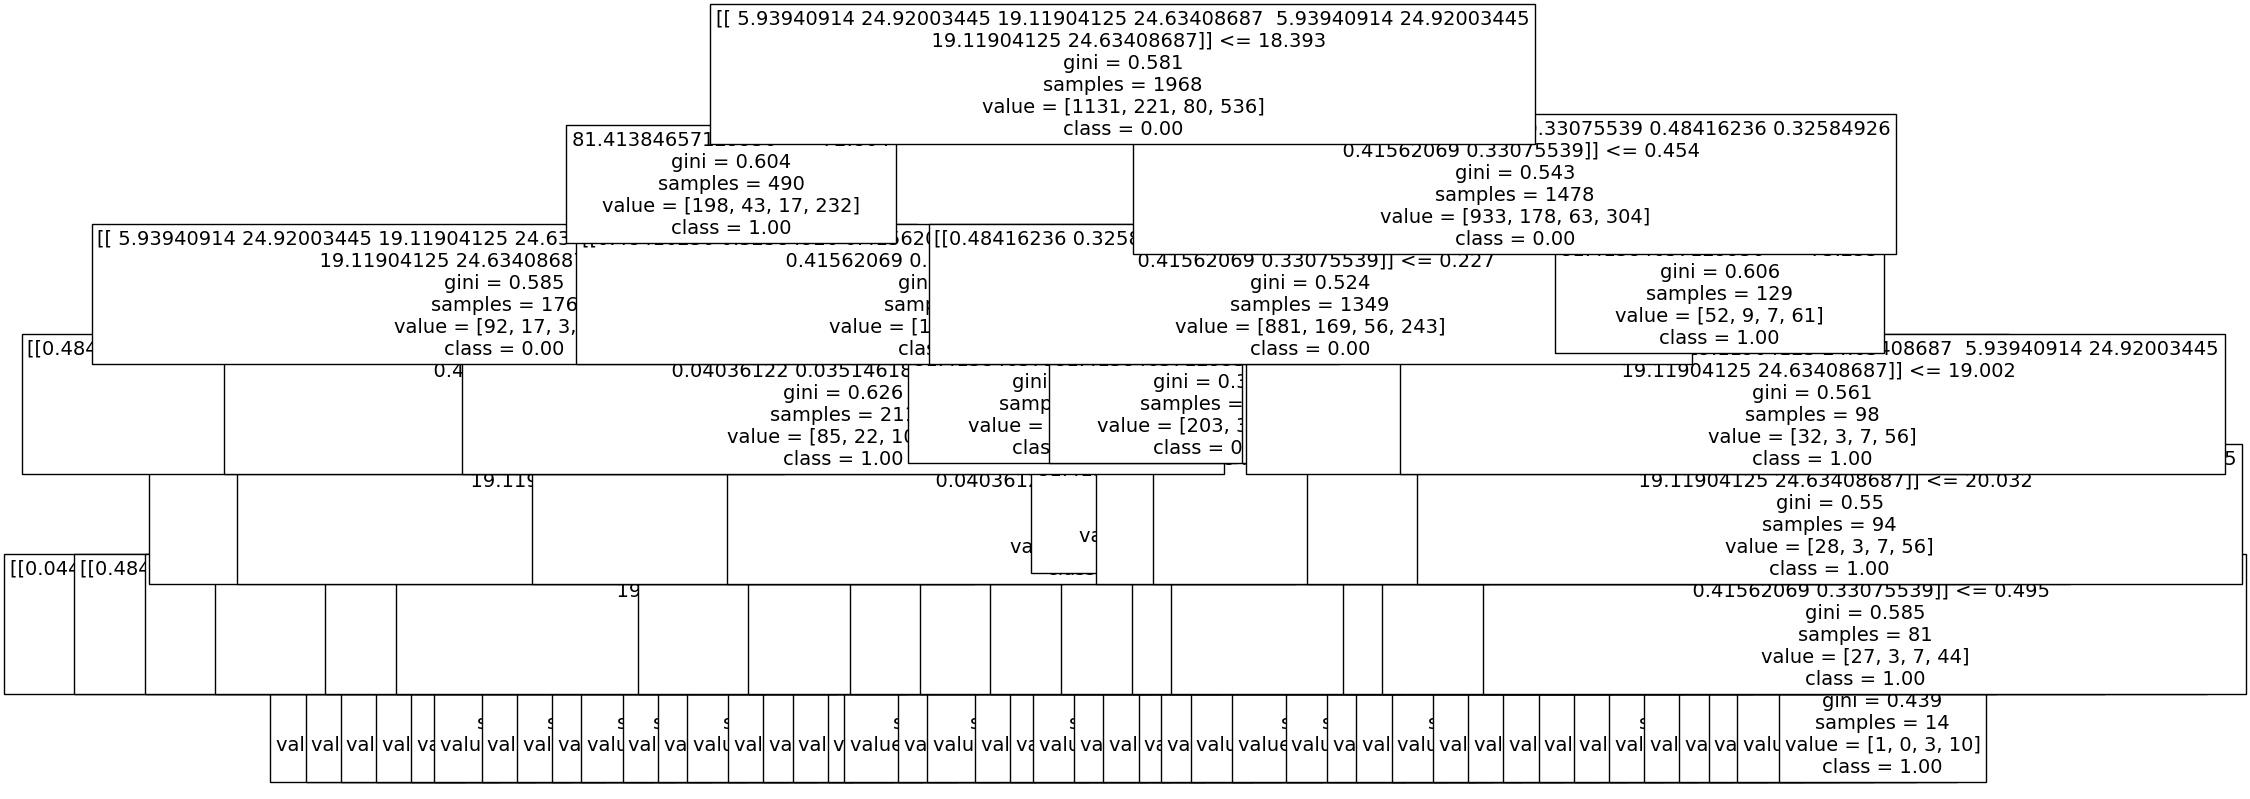

In [11]:
#fit the data
DT = DecisionTreeClassifier(max_depth=6)
#fit and predict with mean feature values
DT.fit(Haralick_mean_features, y_train)
y_mean_pred = DT.predict(test_mean_set)


#evaluation
conf_matrix = confusion_matrix(y_test, y_mean_pred)
accuracy = accuracy_score(y_test, y_mean_pred)
f1 = f1_score(y_test, y_mean_pred, average='weighted')
print(conf_matrix)
print(accuracy)
print(f1)

feature_names = [contrast,homogeneity,energy,entropy]
plt.figure(figsize=(20,10))
a = plot_tree(DT,
              feature_names=feature_names,
              class_names=y_mean_pred,
              fontsize=14)
plt.show()

In [12]:
#method2 -- Local Binary Patterns
LBP_features = []
for x in X_train:
  lbp = local_binary_pattern(x, 8, 1, 'uniform')
  n_bins = int(lbp.max() + 1)
  hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)
  # print(lbp)
  # print(n_bins)
  # print(hist)
  # plt.bar(range(n_bins), hist, width=0.8, align='center')
  # plt.show()
  # break
  LBP_features.append(hist)

LBP_test_set = []
for x in X_test:
  lbp = local_binary_pattern(x, 8, 1, 'uniform')
  n_bins = int(lbp.max() + 1)
  hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)
  LBP_test_set.append(hist)
#fit and predict with LBP feature
DT.fit(LBP_features, y_train)
LBP_pred = DT.predict(LBP_test_set)

In [13]:

#evaluation
conf_matrix = confusion_matrix(y_test, LBP_pred)
accuracy = accuracy_score(y_test, LBP_pred)
f1 = f1_score(y_test, LBP_pred, average='weighted')
print(conf_matrix)
print(accuracy)
print(f1)



[[342   1   0  34]
 [ 69   0   0   5]
 [ 24   0   0   2]
 [ 77   1   0 101]]
0.6753048780487805
0.6138826012089269


## Random Forest

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
#using haralick features
rf.fit(Haralick_mean_features, y_train)
rf_har_pred = rf.predict(test_mean_set)
#evaluation
conf_matrix = confusion_matrix(y_test, rf_har_pred)
accuracy = accuracy_score(y_test, rf_har_pred)
f1 = f1_score(y_test, rf_har_pred, average='weighted')
print(conf_matrix)
print(accuracy)
print(f1)

[[325   9   0  43]
 [ 60   6   0   8]
 [ 19   1   0   6]
 [ 63   4   0 112]]
0.6753048780487805
0.6326353676996502


In [15]:
#using LBP features
rf.fit(LBP_features, y_train)
rf_lbp_pred = rf.predict(LBP_test_set)
#evaluation
conf_matrix = confusion_matrix(y_test, rf_lbp_pred)
accuracy = accuracy_score(y_test, rf_lbp_pred)
f1 = f1_score(y_test, rf_lbp_pred, average='weighted')
print(conf_matrix)
print(accuracy)
print(f1)

[[337   5   1  34]
 [ 60   4   0  10]
 [ 19   0   0   7]
 [ 70   0   1 108]]
0.6844512195121951
0.6340834635979403


## SGD

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.svm import SVC
images, proba, types = load_dataset()

In [17]:
X = images.reshape(images.shape[0], -1)
y = proba
unique_labels = np.unique(y)
label_dict = {label: idx for idx, label in enumerate(unique_labels)}
y= np.array([label_dict[label] for label in y])

# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

#  Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the SGD classifier
print("Training and evaluating SGD Classifier...")
clf_sgd = SGDClassifier(max_iter=1000, tol=1e-3)
clf_sgd.fit(X_train, y_train)
y_pred_sgd = clf_sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

Training and evaluating SGD Classifier...
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       306
           1       0.44      0.24      0.31        58
           2       0.18      0.09      0.12        22
           3       0.67      0.59      0.63       139

    accuracy                           0.69       525
   macro avg       0.50      0.45      0.46       525
weighted avg       0.66      0.69      0.67       525



## SVM

In [18]:
# Using SVM Classifiers
print("Training and evaluating SVM Classifier...")
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

Training and evaluating SVM Classifier...
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       306
           1       1.00      0.09      0.16        58
           2       0.00      0.00      0.00        22
           3       0.77      0.64      0.70       139

    accuracy                           0.73       525
   macro avg       0.62      0.42      0.42       525
weighted avg       0.73      0.73      0.68       525



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
